### Machine Learning Project - Cupcake vs Muffin using Support Vector Machine 

## Import Libraries

In [2]:
import numpy as np
import pandas as pd

from sklearn import svm

import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

### Read the Dataset

In [6]:
recipe=pd.read_excel(r'Cupcake vs Muffin.xlsx')
print(recipe)

       Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0    Muffin     55    28      3       7    5              2        0     0
1    Muffin     47    24     12       6    9              1        0     0
2    Muffin     47    23     18       6    4              1        0     0
3    Muffin     45    11     17      17    8              1        0     0
4    Muffin     50    25     12       6    5              2        1     0
5    Muffin     55    27      3       7    5              2        1     0
6    Muffin     54    27      7       5    5              2        0     0
7    Muffin     47    26     10      10    4              1        0     0
8    Muffin     50    17     17       8    6              1        0     0
9    Muffin     50    17     17      11    4              1        0     0
10  Cupcake     39     0     26      19   14              1        1     0
11  Cupcake     42    21     16      10    8              3        0     0
12  Cupcake     34    17 

### Plot the data

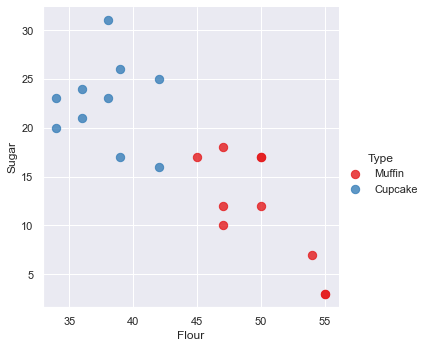

In [20]:
sns.set_theme()
sns.lmplot(data=recipe, x='Flour', y='Sugar', hue='Type', palette='Set1', height=5, fit_reg=False, scatter_kws={"s": 70});

### Format and Preprocess the data

In [22]:
type_label = np.where(recipe['Type']=='Muffin',0,1)
recipe_features = recipe.columns.values[1:].tolist()
print(recipe_features)

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']


In [24]:
ingredients = recipe[['Flour','Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


###  Fit the Model using SVM

In [29]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

### Set the Seperating Hyperplane 

In [30]:
w=model.coef_[0]
a = -w[0]/ w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0])/w[1]


## Plot the parraells to seperate hyperplane that pass through the support vectors
b= model.support_vectors_[0]
yy_down = a* xx + (b[1] - a*b[0])
b = model.support_vectors_[-1]
yy_up = a *xx + (b[1] - a*b[0])

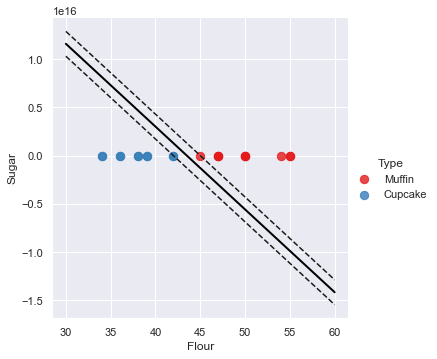

In [33]:
sns.lmplot(data=recipe, x='Flour', y='Sugar', hue='Type', palette='Set1', height=5, fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx,yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

### Create a Function to Predict Muffin or CupCake

In [38]:
def muffin_or_cupcake(Flour,Sugar):
    if(model.predict([[Flour,Sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

### Predict if x# - parts flour and y# parts sugar

In [40]:
muffin_or_cupcake(39,3)

You're looking at a cupcake recipe!


### To Visualize the results on graph

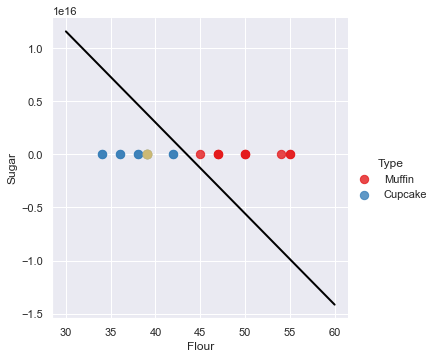

In [41]:
sns.lmplot(data=recipe, x='Flour', y='Sugar', hue='Type', palette='Set1', height=5, fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx,yy, linewidth=2, color='black')
plt.plot(39,3, 'yo', markersize='9')